# Задание 1
## Задача 1

In [1]:
import math

import numpy as np
from lab1.task1.golden_ratio import GoldenRatio
from lab1.task1.fibonacci import Fibonacci
from lab1.task1.dichotomy import Dichotomy
from lab1.watcher import Watcher
from lab1.task2.gradient_descent import GradientDescent
import matplotlib.pyplot as plt

Возьмем следующую унимодальную на отрезке [2.2, 2.8] функцию
$$f(x) = |\sin(x^2)|$$

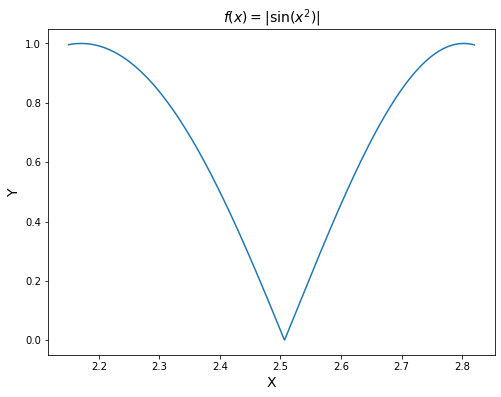

In [111]:
f = Watcher(lambda x: np.abs(np.sin(x ** 2)))
xs = np.linspace(2.15, 2.82, 1000)
ys = list(map(f, xs))
plt.figure(figsize=(8, 6))
plt.plot(xs, ys)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("$f(x) = |\sin(x^2)|$", fontsize=14)
plt.show()

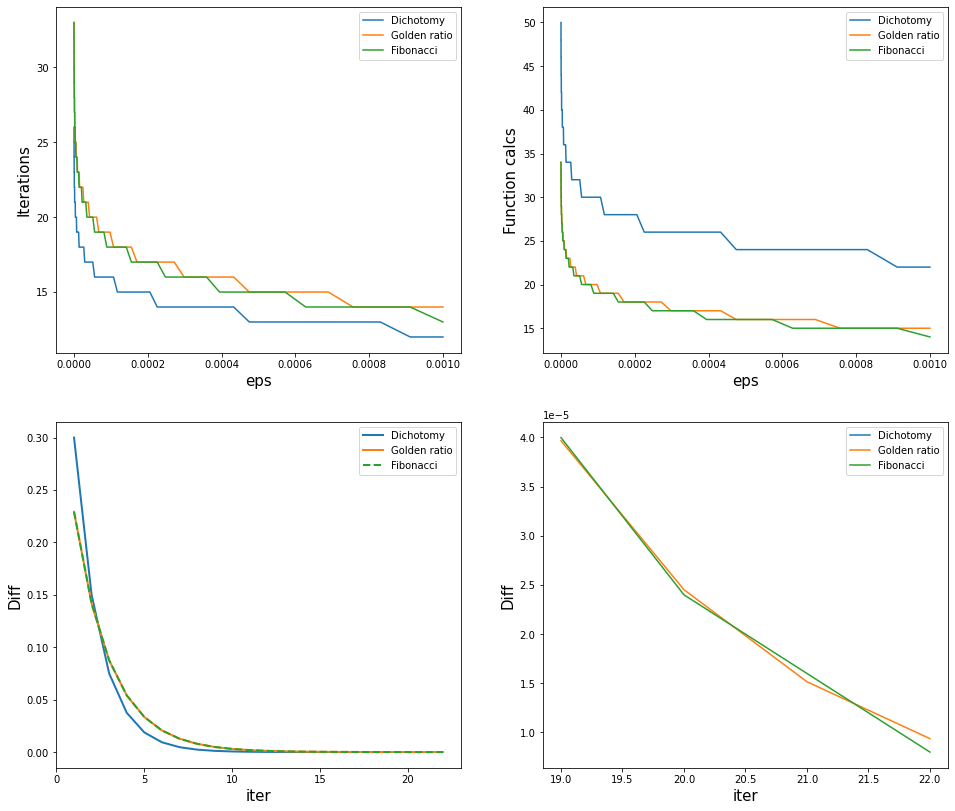

In [6]:
opts = [Dichotomy, GoldenRatio, Fibonacci]
fig = plt.figure(figsize=(16, 14))

# Eps/N
axn = fig.add_subplot(2, 2, 1)
axn.set_xlabel('eps', fontsize=15)
axn.set_ylabel('Iterations', fontsize=15)

# Eps/Calc
axc = fig.add_subplot(2, 2, 2)
axc.set_xlabel('eps', fontsize=15)
axc.set_ylabel('Function calcs', fontsize=15)

for opt_c in opts:
    epss = np.logspace(-7, -3, 100)
    ns = []
    calcs = []
    for eps in epss:
        opt = opt_c(f, eps, [2.2, 2.8])
        opt.opt()
        ns.append(len(opt.log_frame()))
        calcs.append(f.invocations)
    axn.plot(epss, ns, label=opt_c.name)
    axc.plot(epss, calcs, label=opt_c.name)

axn.legend()
axc.legend()

# Next iteration
axd = fig.add_subplot(2, 2, 3)
axd.set_xlabel('iter', fontsize=15)
axd.set_ylabel('Diff', fontsize=15)

axd_sc = fig.add_subplot(2, 2, 4)
axd_sc.set_xlabel('iter', fontsize=15)
axd_sc.set_ylabel('Diff', fontsize=15)

for opt_c in opts:
    opt = opt_c(f, 10e-6, [2.2, 2.8])
    opt.opt()
    diffs = []
    prev = -1
    log = opt.log_frame()
    for i, row in log.iterrows():
        now = row['r'] - row['l']
        if i > 0:
            diffs.append(prev - now)
        prev = now
    if opt_c == Fibonacci:
        st = "--"
    else:
        st = "-"
    axd.plot(range(1, len(log)), diffs, label=opt_c.name, linestyle=st, linewidth=2)
    axd_sc.plot(range(1, len(log))[18:], diffs[18:], label=opt_c.name)

axd.legend()
axd_sc.legend()
plt.show()

## Задача 2

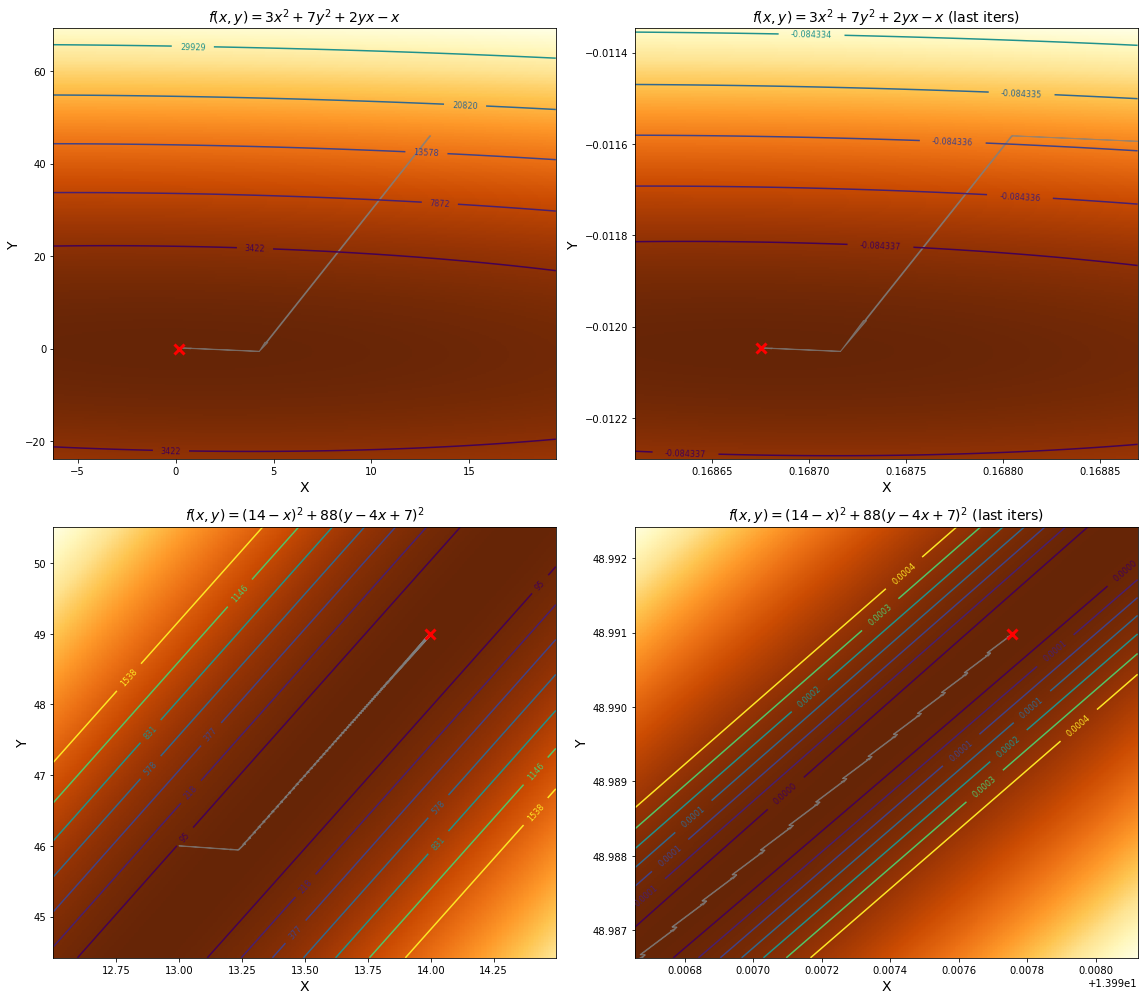

In [63]:
def markers(min_v: float, max_v: float):
    diff = (max_v - min_v) / 7
    return [min_v + diff * (i + 1) * (1.15 ** i) for i in range(7)]

def plot_graph(ind, fig, opt, title, per):
    f = opt.f
    log = opt.log_frame()
    log = log.iloc[-max(3, int(len(log) * per / 100)):]

    x_min = min(log['x'])
    x_max = max(log['x'])
    x_diff = x_max - x_min
    y_min = min(log['y'])
    y_max = max(log['y'])
    y_diff = y_max - y_min

    ax = fig.add_subplot(2, 2, ind)
    n_cnt = 300
    ax.set_xlim([x_min - x_diff / 2, x_max + x_diff / 2])
    ax.set_ylim([y_min - y_diff / 2, y_max + y_diff / 2])
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.set_title(title, fontsize=14)

    xs, ys = np.meshgrid(
        np.linspace(x_min - x_diff / 2, x_max + x_diff / 2, n_cnt),
        np.linspace(y_min - y_diff / 2, y_max + y_diff / 2, n_cnt)
    )

    v_func = np.vectorize(lambda x, y: f(x, y))
    colors = v_func(xs, ys)

    f_min = min(log['f'])
    f_max = max(log['f'])
    grid_min = np.min(colors)
    grid_max = np.max(colors)

    min_v = math.sqrt(f_min * grid_min)
    if f_min < 0 or grid_min < 0:
        min_v = -min_v
    max_v = math.sqrt(f_max * grid_max)
    if f_max < 0 and grid_max < 0:
        max_v = -max_v
    qx = ax.contour(xs, ys, colors, markers(min_v, max_v))

    lg = math.log10(max_v - min_v)
    if lg < 0:
        pw = int(abs(lg)) + 1
    else:
        if lg > 2:
            pw = 0
        else:
            pw = 1
    ax.clabel(qx, fontsize=8, fmt=f'%.{pw}f', inline=1)
    ax.pcolormesh(xs, ys, colors, cmap='YlOrBr_r', shading='nearest')

    ax.plot(mn[0], mn[1], 'x', color='red', ms=10, mew=3)

    last = None
    for ind, e in opt.log_frame().iterrows():
        if last is not None:
            dx = e['x'] - last[0]
            dy = e['y'] - last[1]
            ar_len = math.sqrt(dx ** 2 + dy ** 2)
            head_len = min(2, ar_len / 7)
            width = (x_max - x_min) / 250
            ax.arrow(last[0], last[1], e['x'] - last[0], e['y'] - last[1], width=width, alpha=0.7, color='gray', head_length=head_len, length_includes_head=True)
        last = (e['x'], e['y'])

task2_fun = [
    (lambda x, y: 3 * x ** 2 + 7 * y ** 2 + y * x - x, lambda x, y: np.array([6 * x + y - 1, x + 14 * y])),
    (lambda x, y: (14 - x) ** 2 + 88 * (y - 4 * x + 7) ** 2, lambda x, y: np.array([2 * (1409 * x - 352 * y - 2478), 176 * (7 - 4 * x + y)])),
]

f1_str = '$f(x, y) = 3x^2+7y^2+2yx-x$'
f2_str = '$f(x, y) = (14-x)^2+88(y - 4x + 7)^2$'

params = [
    [(f1_str, 100), (f1_str + ' (last iters)', 10)],
    [(f2_str, 100), (f2_str + ' (last iters)', 5)],
]

fig = plt.figure(figsize=(16, 14))
i = 0
for j in range(len(task2_fun)):
    test = task2_fun[j]
    f = Watcher(test[0], test[1])
    opt = GradientDescent(f, 1e-5, GoldenRatio)
    mn = opt.opt([13, 46])
    for (title, per) in params[j]:
        i = i + 1
        plot_graph(i, fig, opt, title, per)
fig.tight_layout()